# Homework 4

## Andrew Loeppky
## PHYS 509

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import binom

## Question 1

**A.** A medical study tests a treatment on 100 patients. It is known that there is a 50% chance that a patient, if untreated, will get better naturally. (Else the patient dies!) The researcher wants to see if the treatment increases the recovery rate. She designs a study to test the treatment: she will test it on 100 patients, and will reject the null hypothesis at the 95% confidence level if enough patients recover. How many of the 100 patients must survive at the end of the study in order for her to reject the null hypothesis under these conditions?

---

The null hypothesis is that the treatment has no effect, in which case we can represent a group of 100 patients as a binomial with $p=0.5$. Under the null hypothesis, the probability distribution of results is:

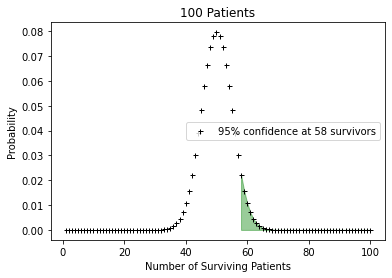

In [87]:
n, p = 100, 0.5
x = np.arange(1,101)
h0 = binom.pmf(x, n, p)  # make the binomial for h0
prob = binom.cdf(x, n, p) # cumulative distn
num_survivors = int(np.min(x[prob >= 0.95])) # how many survivors to reject the
                                             # null hypothesis at 95% confidence

fig, ax = plt.subplots()
ax.plot(x, h0, 'k+', ms=5, label=f'95% confidence at {num_survivors} survivors')
ax.fill_between(x[prob >= 0.95], h0[prob >= 0.95], color="green", alpha=0.4)
ax.legend()
ax.set_title(f"{n} Patients")
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Surviving Patients");

**B.** Her hospital's medical ethics board advises her that if the treatment proves to be very effective, then it would be unethical to continue the study. Instead, she should end the study early and publish the results so that other patients can benefit from the treatment. Therefore she modifies the study. Starting after the first 25 patients are treated, she counts up how many patients have recovered, and calculates the probability that at least that many would have recovered just by chance. If this probability is less than 1%, she will end the study immediately and reject the null hypothesis, concluding that the treatment is effective. She continues to calculate this probability after each additional patient is treated until the treatment has proven effective or until she has treated 100 patients. The treatment is deemed successful if either the study ended early due to its apparent effectiveness, or if after 100 patients the number of recovered patients is greater than that calculated in Part A. In these two cases she will either write a paper saying that the treatment proved effective at the 99% CL or at the 95% CL, depending on whether the trial ended early or not.

Suppose that in reality the treatment has no effect on patient outcomes. What is the probability that the null hypothesis is rejected anyway? What is the probability that researcher publishes a paper rejecting the null hypothesis at the 99% CL?

---

In [3]:
def trigger_end(n, threshold):
    '''
    determine how many patients need to survive to assert xx% confidence that
    the treatment works, given a sample of n patients and a threshold value
    '''
    x = np.arange(0, n + 1)
    p = 0.5
    h0 = binom.pmf(x, n, p)
    prob = binom.cdf(x, n, p)
    num_survivors = int(np.min(x[prob >= threshold]))
    
    return num_survivors

In [4]:
def simulate_trial(numtrials):
    """
    monte carlo simulation for achieving a 99% confidence result under
    the null hypothesis that the proposed treatment is completely
    ineffective
    """
    
    # threshold values for patients 25-100
    ntrigger = np.array([trigger_end(n, 0.99) for n in range(25,101)])

    # initialize the array
    survivors = np.zeros((numtrials, 76))
    
    # simulate the first 25 patients
    survivors[:,0] = np.random.binomial(25, 0.50, numtrials)
    
    # simulate the next 75, stopping if the 99% confidence threshold is reached
    # each new "patient" is a coin flip with 50/50 odds of surviving
    for i in range(1,76):
        
        survivors[:,i] = survivors[:,i-1] + np.random.randint(0,2,size=numtrials)
        
        # cut out any trials that merit a 99% paper 
        survivors[:,i][survivors[:,i] > ntrigger[i]] = np.nan 
          
    return survivors, ntrigger

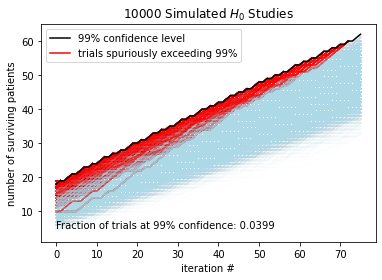

In [8]:
ntrials = 10000
sim, nsurv = simulate_trial(ntrials)

# separate "successes" from "failures" (all are random chance)
for s in sim:
    if np.isnan(sum(s)):
        plt.plot(s, color="red")
    else:
        plt.plot(s, color="lightblue", alpha=0.03)

# plot the results
plt.plot(nsurv, "k", label="99% confidence level")
plt.plot(np.nan, np.nan, color="r", label="trials spuriously exceeding 99%")
plt.xlabel("iteration #")
plt.ylabel("number of surviving patients")
plt.title(f"{ntrials} Simulated $H_0$ Studies")
plt.legend()

# what fraction of studies are terminated early?
result = sim[:,-1]
successes = len(result[np.isnan(result)])
frac = successes / ntrials
plt.annotate(f"Fraction of trials at 99% confidence: {frac}", (0,5));

*With the course of action recommended by the ethics board, a useless treatment is 400\% more likely to be approved than was intended. A properly designed experiment would have a 1% chance of erroneously approving a treatment at the 99% confidence level, not 4% as calculated here. The total probability of rejecting the null hypothesis at either 99% or 95% is* 

$$
0.04 + (1-0.04) 0.05 = 8.8\%
$$

## Question 2

**A.** A theory predicts that a variable y depends on a variable x according to: 

$$
y = 3x^2 -1
$$

The following data set is obtained:

In [93]:
x = np.linspace(0.1, 1, 10)
y_theor = 3 * x ** 2 - 1
y_meas = np.array(
    [-0.951, -0.842, -0.741, -0.492, -0.229, 0.118, 0.494, 0.957, 1.449, 2.055]
)
N = len(x)

The resolution on each y measurement is 0.02. Use a chi^2 statistic to test whether the data are consistent with the theory. Quote a P value.

---

$$
\chi^2 = \sum^N_{i=1}\left(\frac{y_i - f(x_i)}{\sigma_i}\right)^2
$$

In [94]:
# code up the chi2 test:
sigma_i = 0.02
chi2 = np.sum(((y_meas - y_theor) / sigma_i) ** 2)
print(f"{chi2=}")

chi2=24.81499999999992


For a $\chi^2$ of 24.814 with 10 degrees of freedom, the $p$ value is $\boxed{0.0057}$, which i got from an online widget here:

http://courses.atlas.illinois.edu/spring2016/STAT/STAT200/pchisq.html

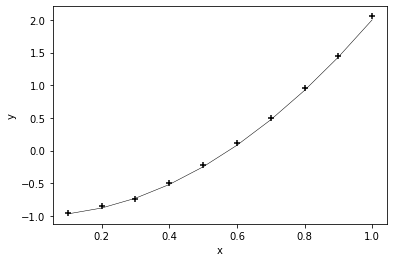

In [96]:
# plot the model and the data
fig, ax = plt.subplots()
ax.plot(x, y_theor, "k", linewidth=0.5)
ax.scatter(x, y_meas, color='k', marker="+")
ax.set_xlabel("x")
ax.set_ylabel("y");

**B.** Your graduate student now comes to you with worries about a possible systematic on the measured y values. She suspects that each y value could be shifted by an amount dy=ax, where a is some constant. Through diligent work she has determined that a=0±0.05. Repeat the calculation of Part A, this time including the effects of this systematic uncertainty.

---

$\chi^2$ with a systematic additive uncertainty:

$$
\chi^2 = \sum^N_{i=1}\left(\frac{y_i - f(x_i) - ax_i}{\sigma_i}\right)^2 + \left(\frac{a}{\sigma_a}\right)^2
$$

Minimize this, fitting for $a$ with an uncertainty of $\sigma_a = 0.05$

min chi2=6.966720699122633


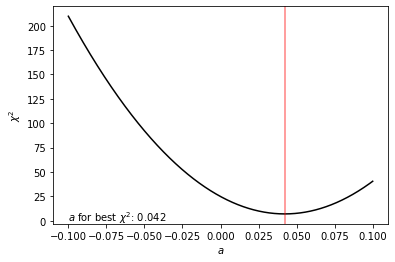

In [86]:
# minimize chi2, fitting for systematic 'a'
sigma_a = 0.05
res = 1e-4
chi2 = np.empty(int(1/res))
syst_err = np.linspace(-0.1, 0.1, int(1 / res))
fig, ax = plt.subplots()
for j, a in enumerate(syst_err):
    chi2[j] = np.sum(((y_meas - y_theor - a * x) / sigma_i) ** 2) + (a / sigma_a) ** 2
    
# visualize    
ax.plot(syst_err, chi2, color="k")
ax.axvline(syst_err[np.argmin(chi2)], color="r", alpha=0.5)
ax.annotate(f"$a$ for best $\chi^2$: {round(syst_err[np.argmin(chi2)],3)}", [-0.1,0])
ax.set_xlabel("$a$")
ax.set_ylabel("$\chi^2$")
print(f"min chi2={np.min(chi2)}")

Now, calculate $p$ value for $\chi^2 = 6.967$ with $11 - 1 = 10$ DOF. (use the same online calculator as A)

$$
\boxed{p = 0.73}
$$

## Question 3 

Suppose that the proportion $p$ of defective items in a large manufactured lot is unknown, and that it is desired to test the following simple hypotheses:

$$
H_0: p=0.3
$$

$$
H_1: p=0.4
$$

Suppose that the prior probability of H0 is 1/4 and the prior probability of H1 is 3/4. Also assume that the loss from choosing an incorrect decision is $1 and the loss from choosing a correct decision is 0. Suppose that a random sample of n items is selected from the lot. Show that the Bayesian test procedure that minimizes the loss is to reject H0 if and only if the proportion of defective items in the sample is greater than [ln (7/6) + (1/n)(ln (1/3)) ]/ln (14/9)

---

Odds ratio from Gregory 3.14:

$$
O_{ij} = \frac{P(M_i|I)}{P(M_j|I)}\frac{P(D|M_i,I)}{P(D|M_j,I)}\tag{G3.14}
$$

The prior odds ratio is given:

$$
\frac{P(M_i|I)}{P(M_j|I)} = \frac{H_0}{H_1} = \frac{0.25}{0.75} = \frac{1}{3}
$$

Write out the the equation for $n$ items and $k$ defects:

$$
O_{01} = \frac{1}{3}\frac{(0.3)^k}{(0.4)^k}\frac{(0.7)^{n-k}}{(0.6)^{n-k}}
$$

Loss is minimized by selecting $H_0$ when $O_{01} > 1$ and $H_1$ when $O_{01} < 1$. Set $O_{01} = 1$ and solve for the fraction of defective items $k/n$:

$$
1 = \frac{1}{3}\left(\frac{3}{4}\right)^k\left(\frac{7}{6}\right)^{n-k}
$$

$$
0 = ln\left(\frac{1}{3}\right) + kln\left(\frac{3}{4}\right) + nln\left(\frac{7}{6}\right) - kln\left(\frac{7}{6}\right) 
$$

$$
0 = ln\left(\frac{1}{3}\right) + k\left(ln\left(\frac{3}{4}\right) - ln\left(\frac{7}{6}\right)\right) + nln\left(\frac{7}{6}\right)
$$

$$
\boxed{\frac{k}{n} = \frac{\frac{1}{n}ln\left(\frac{1}{3}\right) + ln\left(\frac{7}{6}\right)}{ln\left(\frac{14}{9}\right)}}
$$

## Question 4

Suppose that we measure a time-varying noise signal $n(t)$ that is sampled
at time intervals $\Delta t$. We record the value at times $t_k = k\Delta t$, where $k$ ranges
from $0$ to $N - 1$, and $N$ is the number of samples recorded. Assume that $N$ is an
even number. The function $n(t)$ can be written as a discrete Fourier transform:

$$
n(t) = \sum_{m=0}^{N/2}[A_m cos(m\omega_0t) + B_msin(m\omega_ot)]
$$

where $\omega_0 = 2\pi/N\Delta t$. (Note that one may set $B_0 = B_{N/2} = 0$ without loss
of generality here, since the sine function will equal zero if $m = 0$, and at any
discrete time $t_k = k\Delta t$ if $m = N/2$.) We may collectively refer to the set of $N$
coefcients $A_0...A_{N/2}, B_1...B_{N/2-1}$ as $\tilde n$.

A common case is Gaussian stationary noise. This can be defned as noise
for which, at every frequency $f_m = m\omega_0/(2\pi)$, $A_m$ and $B_m$ are two independent
random variables distributed as Gaussians with mean of zero and standard
deviation of $\sigma_m$. (Of course $B_0 = B_{N/2} = 0$ still.) The quantity $\sigma^2_m$
is proportional
to a quantity called the \"power spectral density" of the noise. If $\sigma_m$ has
a constant value $\sigma$ for all frequencies (that is, $\sigma_m = \sigma$ for all values of $m$), then
$n(t)$ is called \"white noise".



### A)

A Consider the measurements $n(t_1)$ and $n(t_2)$ taken at two possibly different
times $t_1 = k_1\Delta t$ and $t_2 = k2\Delta t$. Derive a formula for the covariance
$cov(n(t_1), n(t_2))$. Calculate the mean and variance of $n(t_k)$.

---

$$
cov(n(t_1), n(t_2)) = \langle n(t_1)n(t_2)\rangle - \langle n(t_1)\rangle\langle n(t_2)\rangle
$$

First, calculate $\langle n(t_k)\rangle$ with $t_k = k\Delta t$. 

$$
n(t) = \sum_{m=0}^{N/2} A_mcos\left(\frac{m2\pi t}{N\Delta t}\right) + B_msin\left(\frac{m2\pi t}{N\Delta t}\right)
$$

$$
n(t_k) =  n(k\Delta t) = \sum_{m=0}^{N/2}A_mcos\left(\frac{2\pi mk}{N}\right) + B_msin\left(\frac{2\pi mk}{N}\right)
$$

Write the cosine terms for $m=0, N/2$ outside the sum and substitute the rest $A_m = B_m = \tilde n$:

$$
n(k\Delta t) = A_0cos(0) + A_{N/2}cos\left(\pi k\right) + \sum_{m=1}^{N/2-1}A_mcos\left(\frac{2\pi mk}{N}\right) + B_msin\left(\frac{2\pi mk}{N}\right)
$$

$$
n(k\Delta t) = \tilde n\left[1 + cos\left(\pi k\right) + \sum_{m=1}^{N/2-1}cos\left(\frac{2\pi mk}{N}\right) + sin\left(\frac{2\pi mk}{N}\right)\right]
$$

Use the identity $sin(x) + cos(x) = \sqrt{2}sin\left(\frac{\pi}{4} + x\right)$

$$
n(k\Delta t) = \tilde n\left[1 + cos\left(\pi k\right) + \sum_{m=1}^{N/2-1} \sqrt{2}sin\left(\frac{\pi}{4} + \frac{2\pi mk}{N}\right)\right]
$$

$\tilde n$ is a gaussian with a mean of zero, so the expected value of $n(k\Delta t)$ is zero. The second term in the covariance equation is the second moment of $\tilde n$, so write:

$$
cov(n(t_1), n(t_2)) = \langle n(t_1)n(t_2)\rangle - \langle n(t_1)\rangle\langle n(t_2)\rangle
$$


$$
cov(n(t_1), n(t_2)) = \langle n(t_1)n(t_2)\rangle - 0
$$

$$
cov(n(t_1), n(t_2)) = \sigma_m^2
$$


### B)

Suppose we are trying to fit a function $Cs(t)$ to some measured time
series, where $s(t)$ is a known shape and $C$ is an unknown normalization
we would like to fit for. Our model for the measured data $g(t)$ is
$g(t) = Cs(t) + n(t)$, where $n(t)$ is the randomly generated noise from our
stationary noise model described above. If we write down a least squares
fit directly using the $N$ data points $g(t_k)$, we would find that they have
a non-trivial covariance matrix (see Part A). But suppose that we take a
discrete Fourier transform of $g(t)$ and $s(t)$ to get some sets of coefficients
$\tilde g$ and $\tilde s$, analogous to $\tilde n$. Show that using these you can now write down
a much simpler expression for the least squares formula. Do this, and
taking its derivative with respect to $C$ and setting it equal to zero, derive
a formula for the best fit $\hat C$ in terms of $\tilde g$, $\tilde s$, and $\sigma_m$.

*Note: in the special case of white noise, it can be shown that $cov(n(t1), n(t2))$
is diagonal, in the limit of large $N$. Thus for white noise you can just as easily
fit in the time domain ignoring correlations between measured values. But in
general for other noise spectra this doesn't work, and you're better off doing the
analysis in the frequency domain.*

---